# Problem Set 1
Due April 11th at 5:30pm -- at the start of the class so we can
discuss the solutions in class.

### Before You Start

Make sure to at least take a basic tutorial in the IPython notebook,
otherwise you'll be totally lost.  For this problem set, you should
download flights.csv.bz2 and weather.csv.bz2 datasets from
Canvas (files-data).   Rename the notebook to
LASTNAME_FIRSTNAME-PS1.ipynb.

When done, please submit
1. the notebook itself
2. the rendered html or pdf of it.



## About the Problem Set: 

This problem set is rather similar to ones used for R, dplyr, and
flights data.  Just we use python and pandas.

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. You will be required to submit well
commented python code, documenting all code used in this problem set,
along with a write up answering all questions below. Use figures as
appropriate to support your answers, and when required by the problem.


## Preliminaries

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [138]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib.pyplot as plt
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.2.1 (need at least 1.0)
Numpy version:        1.14.0 (need at least 1.7.1)
SciPy version:         1.0.0 (need at least 0.12.0)
Pandas version:       0.22.0 (need at least 0.11.0)
Mapltolib version:     2.1.2 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


In [39]:
## Let's read the data and print some summary information
## adjust the path for your file system!
flights_df= pd.read_csv('flights.csv')

In [10]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [40]:
flights_df.dest.unique()
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [58]:
# Your code here
len(flights_df[(flights_df.dest=='SEA') & (flights_df.year==2013)])

3923

 -- There were 3923 flights from NYC to SEA -- 

(b) How many airlines fly from NYC to Seattle?

In [60]:
# Your code here
len(flights_df[(flights_df.dest=='SEA')].carrier.unique())

5

 -- Five Flights fly from NYC to SEA -- 

(c) How many unique air planes fly from NYC to Seattle?

In [65]:
len(flights_df[(flights_df.dest=='SEA')].tailnum.unique())

936

 -- Total number of flights to Seattle is 936 -- 

(d) What is the average arrival delay for flights from NC to Seattle?

In [67]:
flights_df[(flights_df.dest=='SEA')].arr_delay.mean()

-1.0990990990990992

 -- Average arrival delay is -1.09, which means the flights on average arrive early. -- 

(e) What proportion of flights to Seattle come from each NYC airport?

In [77]:
# code below takes the count of flights from these origins and then calculate the proportions. 
jfk = len(flights_df[(flights_df.dest=='SEA') & (flights_df.origin=='JFK')])
ewr = len(flights_df[(flights_df.dest=='SEA') & (flights_df.origin=='EWR')])
lga = len(flights_df[(flights_df.dest=='SEA') & (flights_df.origin=='LGA')])
sum = jfk+ewr+lga;
print("From JFK ",jfk/sum)
print("From EWR ",ewr/sum)
print("From LGA ",lga/sum)

From JFK  0.5332653581442773
From EWR  0.46673464185572267
From LGA  0.0


 -- The proportions are as displayed above  -- 

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [117]:
# Your code here
flights_df.groupby([flights_df.year, flights_df.month, flights_df.day])['dep_delay'].mean().idxmax()


(2013, 3, 8)

 -- March 8, 2013 was the date that had the largest average delay in flights. -- 

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [118]:
# Finding the maximum value of departure delay date
flights_df.groupby([flights_df.year, flights_df.month, flights_df.day])['dep_delay'].sum().idxmax()

(2013, 3, 8)

 -- March 8, 2013 was the date that had the maximum delay in flights. -- 

(c) Are there any seasonal patterns in departure delays for flights from NYC?

In [139]:
# Grouping the data by the month to figure out trends in departure delay.
flights_df.groupby([flights_df.year, flights_df.month])['dep_delay'].mean()

year  month
2013  1        10.036665
      2        10.816843
      3        13.227076
      4        13.938038
      5        12.986859
      6        20.846332
      7        21.727787
      8        12.611040
      9         6.722476
      10        6.243988
      11        5.435362
      12       16.576688
Name: dep_delay, dtype: float64

 -- Yes, there is a seasonality in departure delays. I see that the average departure delays are lowest during the
Fall probably due to clear skies and higher values in the Summer. Potential explaination for
this could be the number of people travelling to and from other countries during the summer due to vacations
period, leading to higher air traffic. -- 

(d) On average, how do departure delays vary over the course of a day?

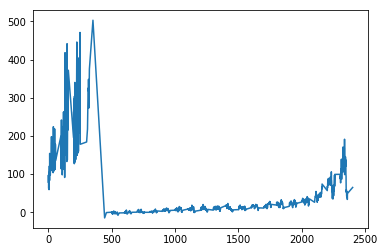

In [140]:
# grouping the data by departure time to observe the departure delay
data = flights_df.groupby([flights_df.dep_time])['dep_delay'].mean()
plt.plot(data)

 -- The plot revelas that peak delay time is before sunrise. The delays also start to rise again during night hours. Thus, we may possibly interpret that the  -- 

## Question 3
   Which flight departing NYC in 2013 flew the fastest?

In [168]:
# Create a new column known as speed, which essentially is distance by time. 
flights_df['speed'] = flights_df.distance/flights_df.air_time
# Find the maximum value of the grouped by data per speed. 
max(flights_df.groupby([flights_df.speed])['flight'])

(11.723076923076922, 216447    1499
 Name: flight, dtype: int64)

 -- Flight 1499 which is departing from NYC flew the fastest amongst all the other flights. -- 

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [198]:
# Concatenation
flights_df['combination'] = flights_df['carrier'].astype(str) + ' ' + flights_df['flight'].astype(str) + ' ' + flights_df['dest'].astype(str)

# Adding the Date column
flights_df['date'] = flights_df['year'].astype(str) + "-" + flights_df['month'].astype(str) + "-" + flights_df['day'].astype(str)


dates = pd.DataFrame(flights_df.date.unique())
dates.rename(columns={0:'date'}, inplace = True)
print ("For a flight to fly every day, it needs to fly these number of days: ", dates.date.count())

# Grouping by flight and date to see which flights fly on which days of the year
flights_rep = flights_df.groupby(['combination','date']).count()
flights_rep.reset_index(level=0, inplace=True) # getting rid of the flight_combo index from the dataframe
flights_rep.reset_index(level=0, inplace=True) # getting rid of the date index from the dataframe
flights_rep.rename(columns={'Unnamed: 0':'count'}, inplace = True)


# Counting number of days a given flight combo flies
flights_rep = flights_rep.groupby('combination').count().sort_values('count', ascending = False) 
flights_rep.reset_index(level=0, inplace=True)

# Getting only flights that fly on all days (365 unique days of the current dataset)
flights_all_days = flights_rep[flights_rep['count'] == 365]['combination']
print ("The flights (i.e. carrier + flight + dest) happen every day are: \n",flights_all_days)

# Getting the destinations they fly to
destinations = []

for f in flights_all_days.astype(str):

    destinations.append(f[len(f)-3:])

destinations = set(destinations)
print ("The flights that fly every day fly to the following destinations: ", destinations)


For a flight to fly every day, it needs to fly these number of days:  365

The flights (i.e. carrier + flight + dest) happen every day are: 
 0       UA 15 HNL
1      B6 371 FLL
2      AA 181 LAX
3      B6 219 CLT
4      AA 119 LAX
5      B6 703 SJU
6     DL 2391 TPA
7     AA 1357 SJU
8     EV 5712 IAD
9      VX 251 LAS
10    AA 1611 MIA
11     VX 413 LAX
12    DL 2159 MCO
13     B6 431 SRQ
14     VX 407 LAX
15      AA 59 SFO
16    B6 1783 MCO
17     B6 359 BUR
Name: combination, dtype: object

The flights that fly every day fly to the following destinations: 

 {'MCO', 'SJU', 'LAX', 'CLT', 'SRQ', 'TPA', 'BUR', 'HNL', 'IAD', 'SFO', 'LAS', 'FLL', 'MIA'}


 -- The flights are between NY and California, Florida, Virginia, North Carolina and Puerto Rico -- 

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


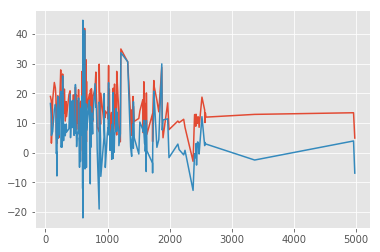

In [243]:
# Is there any stirking relationship between the distance and the delays in general? 

data = flights_df.groupby([flights_df.distance])['dep_delay'].mean()
plt.plot(data)

data = flights_df.groupby([flights_df.distance])['arr_delay'].mean()
plt.plot(data)
 



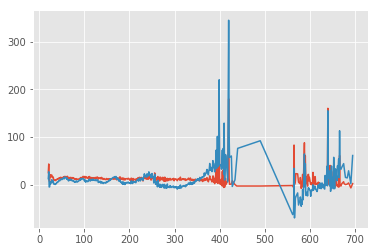

In [246]:
plt.plot(flights_df.groupby([flights_df.air_time])['dep_delay'].mean())
plt.plot(flights_df.groupby([flights_df.air_time])['arr_delay'].mean())


 -- One can conclude as distance goes beyond 2000, the average delay reduces or stabilizes. Also, the air-time hits a peak at 400. Which could quite well indicate that certain distances and certain time measures contribute to delays both in terms of arrival and departure. --

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

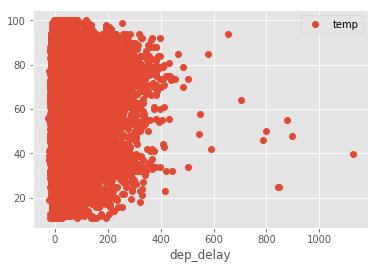

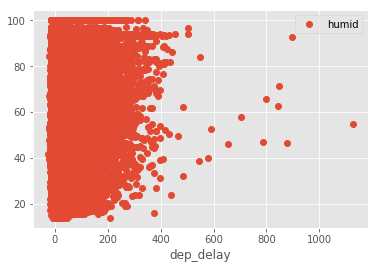

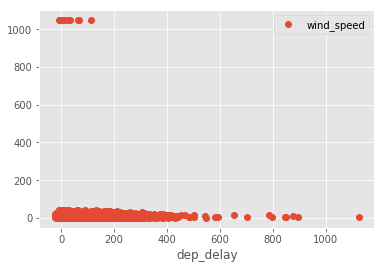

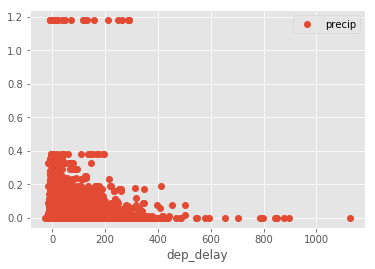

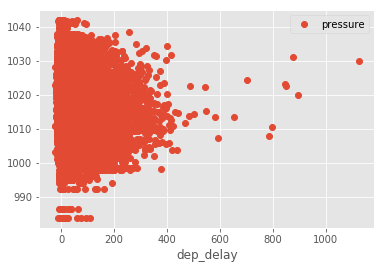

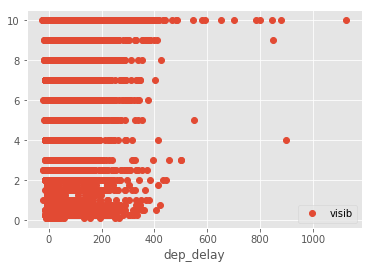

In [226]:
weather_df = pd.read_csv('weather.csv') 
joined_df = pd.merge(flights_df, weather_df,  how='left', left_on=['origin','year', 'month', 'day', 'hour'], right_on = ['origin','year', 'month', 'day', 'hour'])
joined_df.plot(x='dep_delay', y="temp", style="o")
joined_df.plot(x='dep_delay', y="humid", style="o")
joined_df.plot(x='dep_delay', y="wind_speed", style="o")
joined_df.plot(x='dep_delay', y="precip", style="o")
joined_df.plot(x='dep_delay', y="pressure", style="o")
joined_df.plot(x='dep_delay', y="visib", style="o")

-- Visibility, precipitation and temperature seem to be most interesting amongst the factors contributing to the most amount of departure delay. --